#Lab Task
Reimplement the above lab on the California Housing dataset.

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target


In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

print("California Housing Dataset:")
print(f"X_train shape: {X.shape}, y_train shape: {y.shape}")


California Housing Dataset:
X_train shape: (20640, 8), y_train shape: (20640,)


In [3]:
print("Number of Features",len(X[0]))
print("Printing 1st row",X[0])

Number of Features 8
Printing 1st row [   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ]


In [4]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)


In [5]:
model = LinearRegression()
model.fit(X_train, y_train)
y_val_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
print(f"Mean Squared Error on Validation Set: {mse}")


Mean Squared Error on Validation Set: 0.48968053804822637


In [6]:
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error on Test Set: {mse_test}")

Mean Squared Error on Test Set: 0.5779619522442478


In [7]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
model = LinearRegression()

for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    model.fit(X_train_fold, y_train_fold)
    y_val_pred_fold = model.predict(X_val_fold)

    mse_fold = mean_squared_error(y_val_fold, y_val_pred_fold)
    print(f"Fold {fold + 1}: Mean Squared Error on Validation Set: {mse_fold}")


y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"\nMean Squared Error on Test Set: {mse_test}")


Fold 1: Mean Squared Error on Validation Set: 0.5350325216466302
Fold 2: Mean Squared Error on Validation Set: 0.5487761448908883
Fold 3: Mean Squared Error on Validation Set: 0.5314200767117513
Fold 4: Mean Squared Error on Validation Set: 0.5111429089670011
Fold 5: Mean Squared Error on Validation Set: 0.4997884154828335

Mean Squared Error on Test Set: 0.5357763124366643


Train Index for fold 0 [    0     1     2 ... 14443 14444 14445]
Val Index for fold 0 [    8    14    15 ... 14427 14446 14447]
Train Index for fold 1 [    1     2     4 ... 14445 14446 14447]
Val Index for fold 1 [    0     3    10 ... 14438 14442 14444]
Train Index for fold 2 [    0     1     2 ... 14445 14446 14447]
Val Index for fold 2 [   12    26    28 ... 14440 14441 14443]
Train Index for fold 3 [    0     1     3 ... 14445 14446 14447]
Val Index for fold 3 [    2     6     7 ... 14435 14436 14439]
Train Index for fold 4 [    0     2     3 ... 14444 14446 14447]
Val Index for fold 4 [    1     4     5 ... 14428 14431 14445]


/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


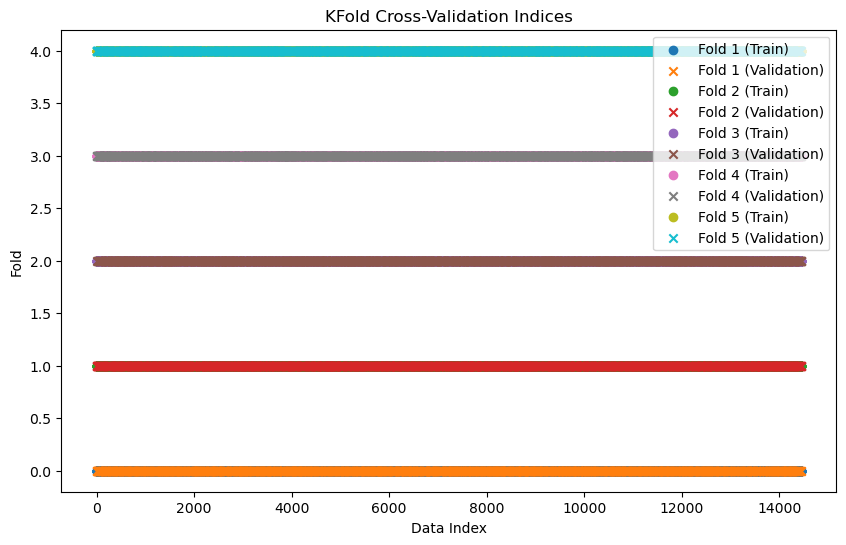

In [8]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Plot the indices for each fold
fig, ax = plt.subplots(figsize=(10, 6))

for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    ax.scatter(train_index, [fold] * len(train_index), label=f'Fold {fold + 1} (Train)', marker='o')
    ax.scatter(val_index, [fold] * len(val_index), label=f'Fold {fold + 1} (Validation)', marker='x')
    print(f"Train Index for fold {fold}", train_index )
    print(f"Val Index for fold {fold}", val_index )
ax.set_xlabel('Data Index')
ax.set_ylabel('Fold')
ax.set_title('KFold Cross-Validation Indices')
ax.legend()
plt.show()
